# Calculo mulltidimensional: Parte 5
## Three fold integrals (integrales triples)

* indefinidas`
$$\int \int \int 2 x^2 dz dy dx$$
* definidas
    * analitica
$$\int_0^1 \int_0^{1-x^2} \int_0^{1 - x^2 - y^2} 2 x^2 dz dy dx .$$
    * no analitica
$$\int_0^1 \int_0^{1-x^2} \int_0^{1 - x^2 - y^2} 2 x \mathrm{e}^{-y} \cos z dz dy dx .$$


In [1]:
import sympy as sp
from sympy import symbols, integrate
x,y,z = symbols('x y z')
f = 2*x**2
integrate(f, z, y, x)

2*x**3*y*z/3

In [2]:
from sympy import exp, cos
x,y,z = symbols('x y z')
f = 2*x**2
limitsz = (z, 0, 1 - x**2 - y**2)
limitsy = (y, 0, 1 - x**2 )
limitsx = (x, 0, 1 )

I = integrate( f, limitsz, limitsy, limitsx)
I

16/135

In [3]:
# integracion no analitica
f = 2*x*exp(-y)*cos(z)
I = integrate(f, limitsz, limitsy, limitsx)
I

-2*Integral(x*Integral(exp(-y)*sin(x**2 + y**2 - 1), (y, 0, 1 - x**2)), (x, 0, 1))

In [4]:
I.simplify()

-2*Integral(x*Integral(exp(-y)*sin(x**2 + y**2 - 1), (y, 0, 1 - x**2)), (x, 0, 1))

In [5]:
# evaluacion numerica
# sympy tienen evauacion numerica de integrales triples?
from scipy.integrate import tplquad # triple quadrature
f = lambda z,y,x : 2*x*exp(-y)*cos(z)

I, error= tplquad( f, 0,1, lambda x:0, lambda x: 1 - x**2, lambda x,y:0, lambda x, y: 1 - x**2) # integral y error
print("integral=", I)
print("error=", error)

integral= 0.21386068713162287
error= 7.909421694649404e-15


In [6]:
a=0.1
f'{a:0.30f}'

'0.100000000000000005551115123126'

## Integrales de linea
Comenzamos creando una curva en `SymPy`

In [7]:
# una curva en sympy
from sympy import symbols, Matrix, Function, diff, integrate
t = symbols('t', real=True)
x,y,z,f = symbols('x y z f', cls=Function, real=True)
# ecuaciones parametricas
x = x(t)
y = y(t)
z = z(t)

r = Matrix( [x,y,z]) # r es el radio vector de la curva.
r



Matrix([
[x(t)],
[y(t)],
[z(t)]])

### Teoria
#### Integrales de linea sobre campos escalares.
Sea $C$ una curva $r=r(t)$ parametrizada por $t$, desde el punto $a$ hasta el punto $b$, $a,b \in \mathbb{R}^3$ , sobre un campo escalar $f=f(x,y,z)$,
La integral de linea del campo $f=f(x(t), y(t), z(t))$ esta dada por


$$\int_C f(x,y,z) dC = \int_a^b f(x(t), y(t), z(t)) dt  .$$
Podemos pensar en que la curva esta parametrizada por la longitud de arco $s$,
entonces haciendo el cambio variable tenemos
$$\int_C f(x,y,z) dC = \int_a^b f(x(s), y(s), z(s)) \frac{ds}{dt} dt  .$$
De clases anteriores

$$\frac{ds}{dt} = \sqrt{\dot{x}^2 + \dot{y}^2 + \dot{z}^2}$$
es la rapidez $\| v \|$.

De forma que

$$\int_C f(x,y,z) ds = \int_a^b f(x(s), y(s), z(s)) \sqrt{\dot{x}^2 + \dot{y}^2 + \dot{z}^2} dt  .$$

o en forma vectorial

$$\int_C f dx  = \int_a^b f(r(t)) \| r'(t) \| dt.$$
donde $r=r(t)=((x(t), y(t), z(t))$.

In [8]:
f = f(x,y,z)
f

f(x(t), y(t), z(t))

In [9]:
integrand = f*sp.sqrt( diff(r,t).dot(diff(r,t)))
integrand

sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)*f(x(t), y(t), z(t))

In [10]:
a = symbols('a')
b = symbols('b')
integ = integrate(integrand, (t, a, b))
integ

Integral(sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)*f(x(t), y(t), z(t)), (t, a, b))

In [11]:
# verificacion que cuando a=b la integral da 0
integ = integrate(integrand, (t, a, a))
integ

0

**Ejemplo 1**: Evalue $\int_C (x^2 + y^2 + z) ds$ donde $C$ es una helice

$r(t) = (\cos t, \sin t, t)$, y $t \in [0, 2 \pi]$.

In [12]:
int2 = integrand.subs(
    {
        f: x**2 + y**2 + z,
        x: sp.cos(t),
        y: sp.sin(t),
        z : t
    }

)
int2

(t + sin(t)**2 + cos(t)**2)*sqrt(Derivative(t, t)**2 + Derivative(sin(t), t)**2 + Derivative(cos(t), t)**2)

In [13]:
int3 = int2.doit()
int3

(t + sin(t)**2 + cos(t)**2)*sqrt(sin(t)**2 + cos(t)**2 + 1)

In [14]:
int4 = int3.simplify()
int4

sqrt(2)*(t + 1)

In [15]:
sln  = integrate( int4, (t, 0, 2*sp.pi))
sln

2*sqrt(2)*pi + 2*sqrt(2)*pi**2

In [16]:
sln.simplify()

2*sqrt(2)*pi*(1 + pi)

In [17]:
# numerica
sln.evalf()

36.8012226748722

**Ejemplo 2**: Integral no analitica


Encuentre
$$\int_C f(x,y,z) dt .$$
para $f(x,y,z) = 2 y \exp(-x^2)*y + \sqrt{z}$ donde $C$ es la helice (helix)
$(\cos t, \sin t, t )$, $t \int [0, 2 \pi]$.

In [18]:
# una funcion no integrable analiticamente
int2 = integrand.subs(
    {
        f : 2*sp.exp(-x**2)*y + sp.sqrt(z),
        x : sp.cos(t),
        y : sp.sin(t),
        z : t
    }
)
int2

(sqrt(t) + 2*exp(-cos(t)**2)*sin(t))*sqrt(Derivative(t, t)**2 + Derivative(sin(t), t)**2 + Derivative(cos(t), t)**2)

In [19]:
# do it
int3 = int2.doit()
int3

(sqrt(t) + 2*exp(-cos(t)**2)*sin(t))*sqrt(sin(t)**2 + cos(t)**2 + 1)

In [20]:
# simplificando una vez mas.
int4 = int3.simplify()
int4

sqrt(2)*(sqrt(t) + 2*exp(sin(t)**2 - 1)*sin(t))

In [21]:
# integramos
integrate( int4, (t, 0, 2 * sp.pi))

sqrt(2)*(Integral(2*exp(sin(t)**2)*sin(t), (t, 0, 2*pi)) + Integral(E*sqrt(t), (t, 0, 2*pi)))*exp(-1)

In [22]:
# como no es analitica la hacemos numerica con scipy
from sympy import lambdify
from scipy.integrate import quad

# use quad from scipy
intLambda = lambdify( [t], int4)
quad( intLambda, 0, 2*sp.pi)

(14.848874658217884, 1.6485562535326496e-14)

### Actividad #1
Considere un alhambare en forma de helice $(\cos t, \sin t, t)$ (un resorte). Si la densidad a lo largo de la curva esta dada por $\rho(x,y,z)= x^2 \exp(-y^2) | \cos z | $.
Encuentre la **masa** del resorte. $t \in [0, 2 \pi]$

## Campos vectoriales

Los campos vectoriales son funciones


\begin{eqnarray}
f : \mathbb{R}^m &\to& \mathbb{R}^n \\
x &\mapsto& f(x)
\end{eqnarray}

Hay muchos contextos para definir campos vectoriales.

* La fisica. Campo electrico, magnetico, nuclear, de onda, etc.
* El gradiente de un campo escalar es un campo vectorial. Vemos un ejemplo a continuacion.
* Cambio de coordenadas en calculo multivariado. Por ejemplo rectangulares a esfericas, o a cilindricas, etc.
* Parametrizacion de superficies.

Comencemos con el siguiente ejemplo tomado de la internet.

**Ejemplo 3**: Considere el campo escalar

\begin{eqnarray}
z : \mathbb{R}^2 &\to& \mathbb{R} \\
(x,y) &\mapsto& x \exp(-x^2 - y^2)
\end{eqnarray}

El gradiente de este campo escalar es un campo vectorial

\begin{eqnarray}
\nabla z : \mathbb{R}^2 &\to& \mathbb{R}^2 \\
(x,y) &\mapsto& \left ( \frac{\partial z}{\partial x}(x,y), \frac{\partial z}{\partial y}(x,y)  \right )
\end{eqnarray}

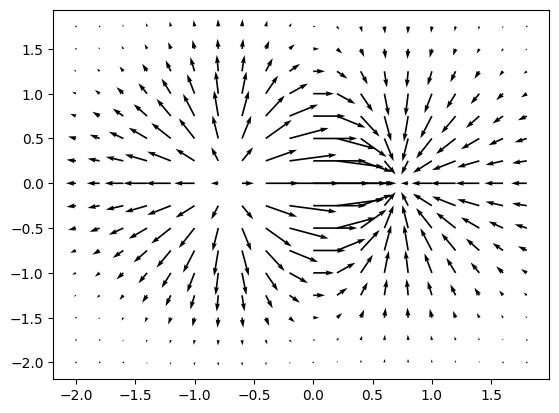

In [25]:
import matplotlib.pyplot as plt
import numpy as np
x,y = np.meshgrid(np.arange(-2, 2, .2), np.arange(-2, 2, .25))
z = x*np.exp(-x**2 - y**2)
v,u = np.gradient(z, .2, .2)

fig, ax = plt.subplots()
q = ax.quiver(x,y,u,v)
plt.show()

**Ejemplo 4**: Campos vectoriales (tomado de alguna parte de la internet, con modificaciones)

Considere el siguiente campo electrico en 2D.

$$E_x = \frac{x+1}{(x+1)^2 + y^2 } + \frac{x-1}{(x-1)^2 + y^2} .$$
$$E_y = \frac{y}{(x+1)^2 + y^2 } - \frac{y}{(x-1)^2 + y^2} .$$


El papel y la pantalla del computador son 2 dimensionales. Los campos
de $\mathbb{R}^2 \to \mathbb{R}^2$ tiene 4 dimensiones (dos del dominio, dos del rango). Como graficamos eso? Esto tambien aplica para funciones de variable compleja en variable compleja $f: \mathbb{C} \to \mathbb{C}$.

# Proxima clase.
Graficar de 4 formas distintas este campo.